# Coding Assignment 2

This assignment focuses on Lecture 2 and content from chapters 8-9. Refer to the Lecture 2 Jupyter notebook but also to the Lecture 1 Notebook. If you did the challenge, refer to that as well. The coding assignments will get more challenging as the course progresses to ensure that you are developing an applied understanding. However, the concept is similar to the first assignment. Here, you will work with experimental data that has been used to understand the relationship between chemical structure (of a fragrance) and its smell. The goal is to simulate the use of unsupervised ML to gain insight into the data.

The locations where the code needs to be enirely added or simply requires the addition of arguments or data are under headings

In [1]:
import pandas as pd
import numpy as np

In [2]:
fragrance_data = pd.read_csv("fragrance_data_assignment_2.csv")

In [3]:
fragrance_data.set_index("Stimulus", drop=True, inplace=True)

In [4]:
fragrance_data.head()

,"FRUITY,CITRUS",LEMON,GRAPEFRUIT,ORANGE,"FRUITY,OTHER THAN CITRUS",PINEAPPLE,GRAPE JUICE,STRAWBERRY,"APPLE, FRUIT",PEAR,...,"PUTRID, FOUL, DECAYED","FECAL, LIKE MANURE",CADAVEROUS,SICKENING,"DRY, POWDERY",CHALKY,LIGHT,HEAVY,"COOL,COOLING",WARM
Stimulus,,,,,,,,,,,,,,,,,,,,,
Abhexone_high,NaN,0.00,0.00,0.00,1.48,0.00,0.74,0.00,0.74,0.00,...,2.96,0.74,0.74,10.37,7.41,0.00,19.26,23.70,2.96,11.85
Acetophenone_high,2.34,0.67,0.34,0.67,11.71,1.00,2.01,3.01,0.00,2.01,...,2.68,1.00,1.00,14.39,6.02,0.00,16.38,39.15,15.72,25.76
AcetylPyridine_high,0.00,0.71,0.00,0.00,0.71,0.00,0.00,2.14,0.00,0.00,...,8.57,1.43,2.14,16.43,15.71,3.57,6.43,30.00,0.00,19.29
Adoxal_high,6.90,5.17,1.72,6.03,5.17,5.17,0.00,1.72,0.86,1.72,...,3.45,0.00,0.00,25.00,6.03,2.59,23.28,15.52,8.62,12.93
AldehydeC-16highcon_high,15.08,5.56,0.00,9.52,61.11,11.11,13.49,39.68,0.79,7.14,...,0.79,0.00,0.00,2.38,0.79,0.79,28.57,7.14,15.87,6.35


In [5]:
# This tells us there are 160 rows (each row is a chemical sample) with 145 columns (each column is a fragrance characteristic)
fragrance_data.shape

(160, 146)

In [6]:
# set_option displays all 146 columns (displayed as rows) of dataframe
#pd.set_option('display.max_rows', None)
fragrance_data.dtypes

FRUITY,CITRUS               float64
LEMON                       float64
GRAPEFRUIT                  float64
ORANGE                      float64
FRUITY,OTHER THAN CITRUS    float64
                             ...   
CHALKY                      float64
LIGHT                       float64
HEAVY                       float64
COOL,COOLING                float64
WARM                        float64
Length: 146, dtype: object

In [7]:
#pd.reset_option('display.max_rows', None)

In [8]:
# set_option displays all 146 columns of dataframe
#pd.set_option('display.max_columns', None)
fragrance_data.describe()

,"FRUITY,CITRUS",LEMON,GRAPEFRUIT,ORANGE,"FRUITY,OTHER THAN CITRUS",PINEAPPLE,GRAPE JUICE,STRAWBERRY,"APPLE, FRUIT",PEAR,...,"PUTRID, FOUL, DECAYED","FECAL, LIKE MANURE",CADAVEROUS,SICKENING,"DRY, POWDERY",CHALKY,LIGHT,HEAVY,"COOL,COOLING",WARM
count,159.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,...,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000
mean,5.564088,4.924750,1.074375,2.951062,10.207312,2.700813,1.563438,2.601813,0.371437,1.757625,...,7.517625,3.201875,2.696813,15.541813,6.949500,1.304187,20.329438,19.538688,12.406625,12.104556
std,10.141332,10.727709,2.677085,6.372728,14.132140,7.752335,4.520349,5.916238,0.727621,2.690119,...,11.122795,7.115117,5.325745,17.115168,3.947928,3.043496,11.094405,9.546364,10.952031,5.304751
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.670000,0.000000,0.710000,1.940000,0.000000,0.000000
25%,0.720000,0.590000,0.000000,0.000000,1.472500,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.810000,0.000000,0.000000,3.985000,3.697500,0.000000,12.107500,12.875000,4.842500,8.562500
50%,1.870000,1.565000,0.000000,0.745000,5.725000,0.810000,0.000000,0.780000,0.000000,0.780000,...,3.310000,0.720000,0.710000,9.330000,6.670000,0.715000,20.995000,18.085000,10.525000,11.405000
75%,5.650000,4.245000,0.782500,2.640000,10.932500,2.045000,1.332500,2.140000,0.720000,2.567500,...,8.667500,2.165000,2.267500,18.952500,9.225000,1.470000,27.417500,25.702500,15.840000,14.752500
max,68.670000,80.000000,21.330000,54.070000,70.710000,77.400000,35.000000,42.860000,4.690000,18.120000,...,62.860000,45.000000,29.290000,81.430000,22.140000,30.770000,47.470000,45.990000,65.780000,34.290000


In [9]:
#pd.reset_option('display.max_columns', None)

In [10]:
# sums up number of nonNULL records per column
fragrance_data.notnull().sum().sort_values(ascending=True)

FRUITY,CITRUS           159
CREOSOTE                159
SOUR, VINEGAR           160
SHARP, PUNGENT, ACID    160
BITTER                  160
                       ... 
RAISINS                 160
MOLASSES                160
COCONUT                 160
CARAWAY                 160
WARM                    160
Length: 146, dtype: int64

In [11]:
# displays the two columns that have NULL values
fragrance_data.notnull().sum()[fragrance_data.notnull().sum() < 160]

FRUITY,CITRUS    159
CREOSOTE         159
dtype: int64

In [12]:
fragrance_data.notnull().sum().sort_values(ascending=True) == fragrance_data.shape[0]

FRUITY,CITRUS           False
CREOSOTE                False
SOUR, VINEGAR            True
SHARP, PUNGENT, ACID     True
BITTER                   True
                        ...  
RAISINS                  True
MOLASSES                 True
COCONUT                  True
CARAWAY                  True
WARM                     True
Length: 146, dtype: bool

In [13]:
(fragrance_data.notnull().sum() == fragrance_data.shape[0]).all()

False

After running the code above, you will see there is missing data. We have to address this.

# Handle Missing Data (Assignment Starts Here)

In [14]:
fragrance_data.describe()[["FRUITY,CITRUS","CREOSOTE"]]

,"FRUITY,CITRUS",CREOSOTE
count,159.000000,159.000000
mean,5.564088,3.449937
std,10.141332,4.605947
min,0.000000,0.000000
25%,0.720000,0.780000
50%,1.870000,2.010000
75%,5.650000,4.290000
max,68.670000,27.300000


In [15]:
# This tells me the most frequent value
fragrance_data["FRUITY,CITRUS"].value_counts().sort_values(ascending=False)

0.00     33
1.43      5
0.72      4
0.67      3
1.00      3
         ..
4.39      1
3.62      1
11.68     1
16.67     1
2.15      1
Name: FRUITY,CITRUS, Length: 106, dtype: int64

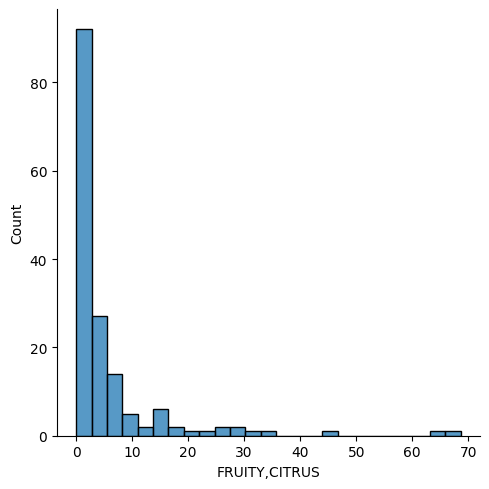

In [16]:
import seaborn as sns

sns.displot(fragrance_data["FRUITY,CITRUS"],bins = 25)

In [17]:
# This tells me the most frequent value
fragrance_data["CREOSOTE"].value_counts().sort_values(ascending=False)

0.00    24
0.78     5
2.34     4
4.29     4
1.43     4
        ..
3.62     1
2.38     1
1.57     1
3.15     1
2.17     1
Name: CREOSOTE, Length: 97, dtype: int64

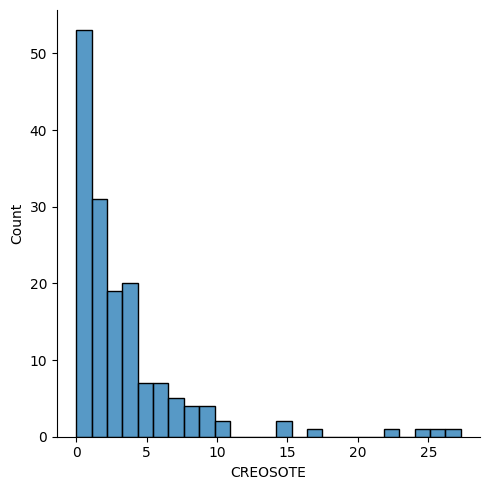

In [18]:
sns.displot(fragrance_data["CREOSOTE"],bins=25)

**I'm going to use the medan since it is less susceptible to outliers.**

In [19]:
# I suggest you fill or replace the missing data with the mean or median, a process formally referred to as "imputing"
from sklearn.impute import SimpleImputer

median_imputer = SimpleImputer(missing_values=np.nan, strategy='median')
fragrance_data = pd.DataFrame(median_imputer.fit_transform(fragrance_data),
                              index = fragrance_data.index,
                              columns = fragrance_data.columns)

In [20]:
# hopefully, the test passes now. Check again.
(fragrance_data.notnull().sum() == fragrance_data.shape[0]).all()

True

## Scale Data

In [21]:
from sklearn.preprocessing import StandardScaler

s = StandardScaler()
X_train_scaled = pd.DataFrame(s.fit_transform(fragrance_data),
                              index = fragrance_data.index,
                              columns=fragrance_data.columns)

# Check for  Correlations

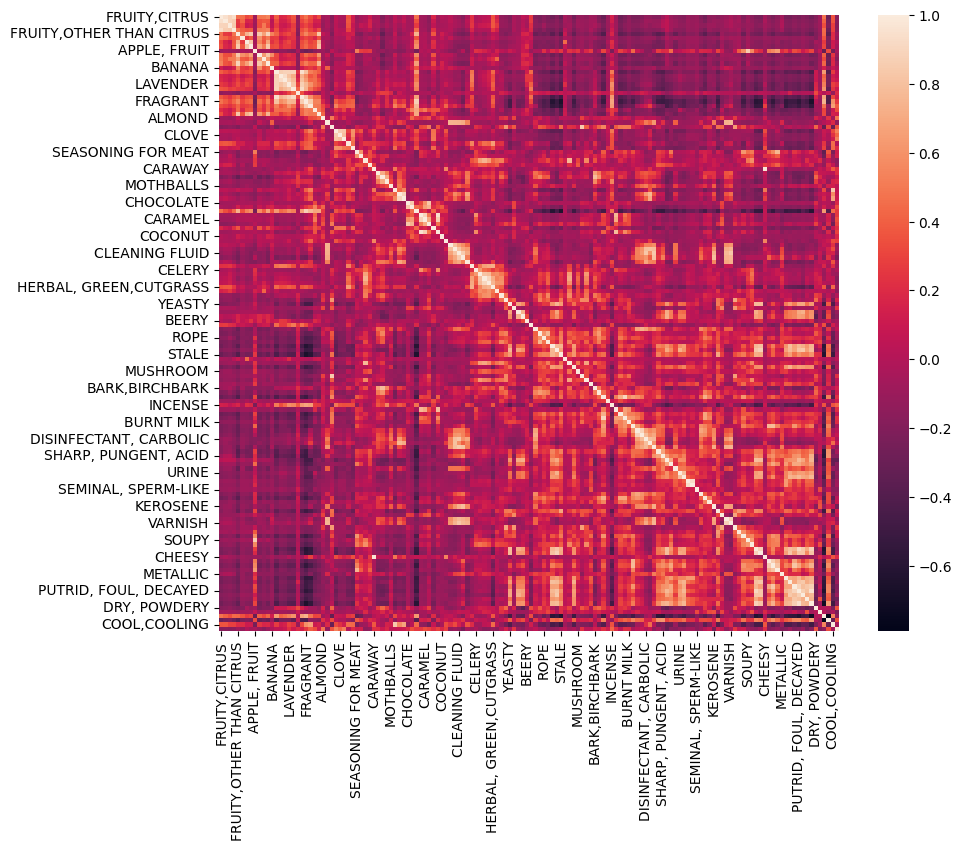

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = X_train_scaled.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr)
plt.show()

In [23]:
#pd.set_option('display.max_rows', None)
corr.unstack()
#pd.reset_option('display.max_rows', None)

FRUITY,CITRUS  FRUITY,CITRUS               1.000000
               LEMON                       0.950276
               GRAPEFRUIT                  0.889058
               ORANGE                      0.942155
               FRUITY,OTHER THAN CITRUS    0.461207
                                             ...   
WARM           CHALKY                     -0.232421
               LIGHT                      -0.146268
               HEAVY                       0.331385
               COOL,COOLING               -0.054480
               WARM                        1.000000
Length: 21316, dtype: float64

**To make the heatmap more digestible, I created a for loop to break the correlation matrix into 15x15 chunks. Take note that the columns/features FRUITY,CITRUS to ROSE are fixed as it traverses through the remaining columns/features.**

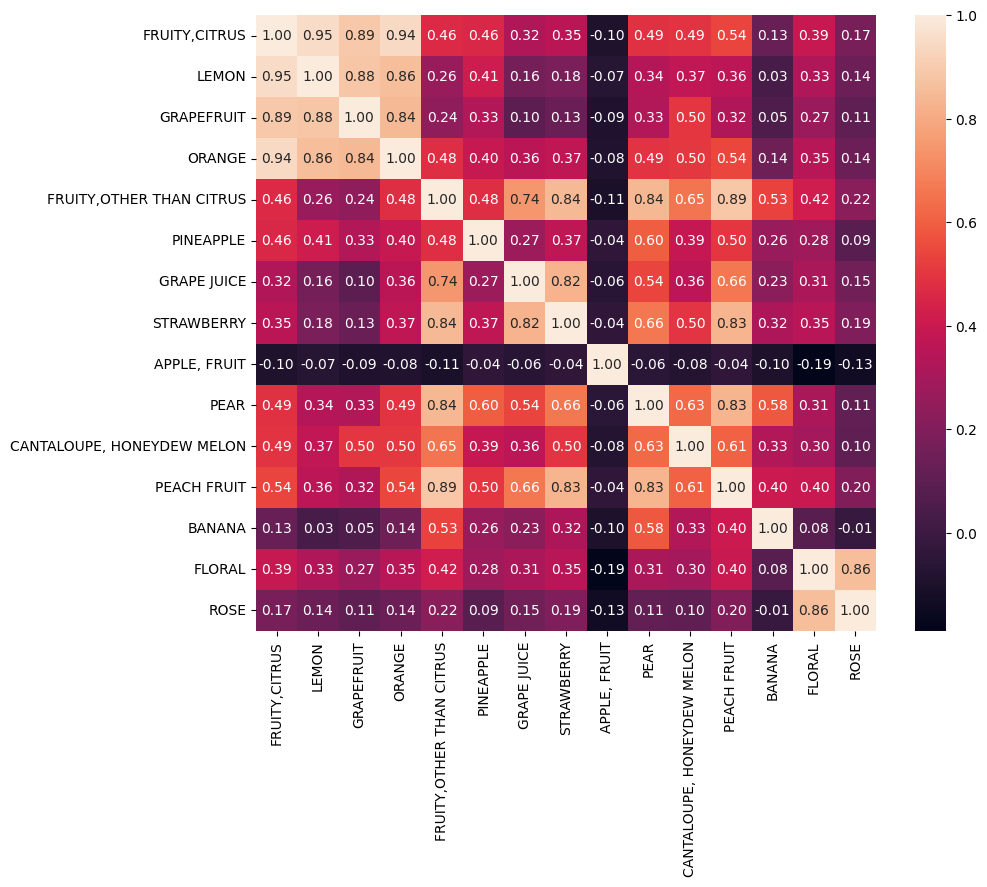

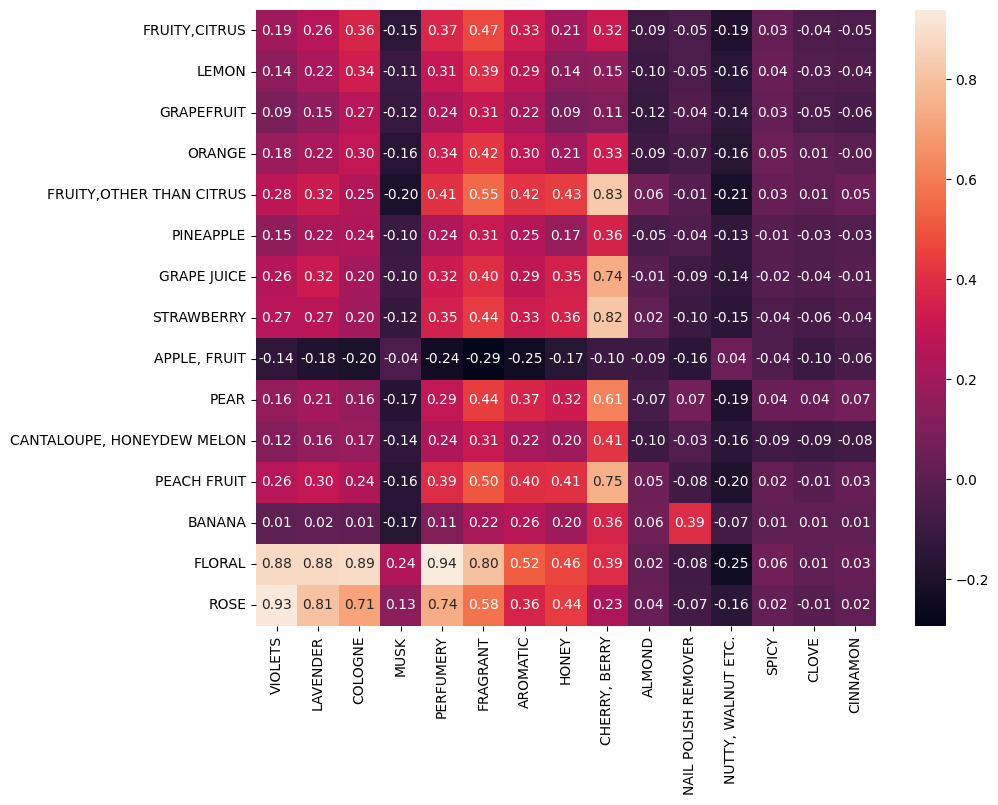

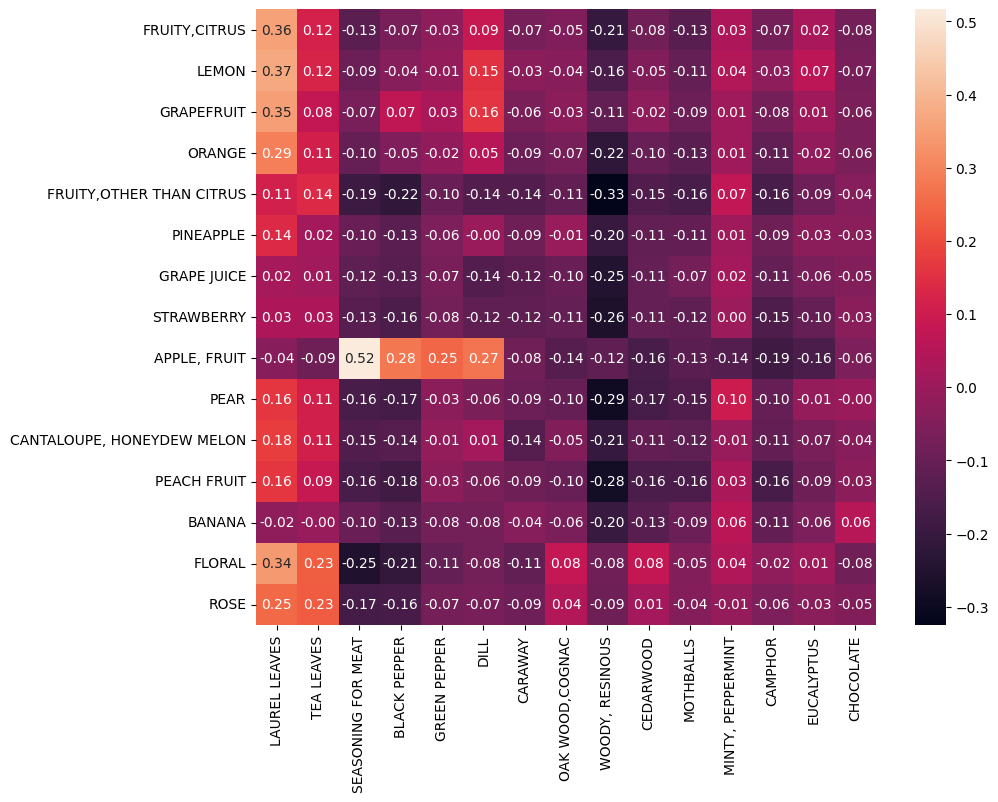

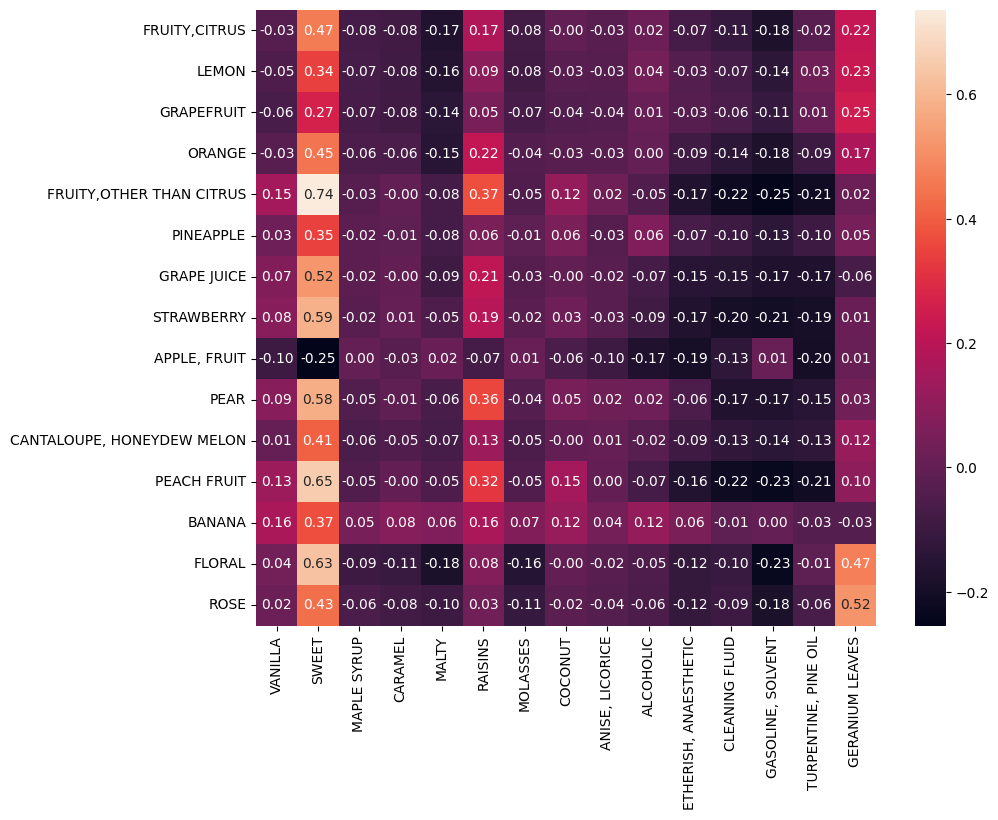

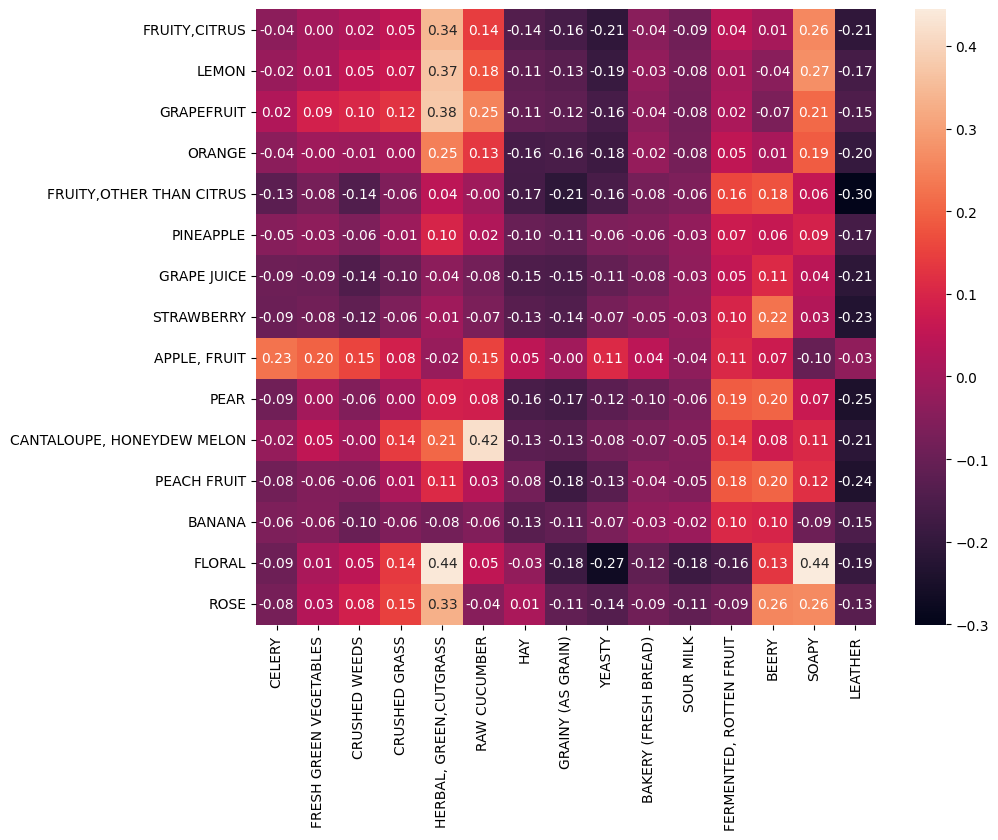

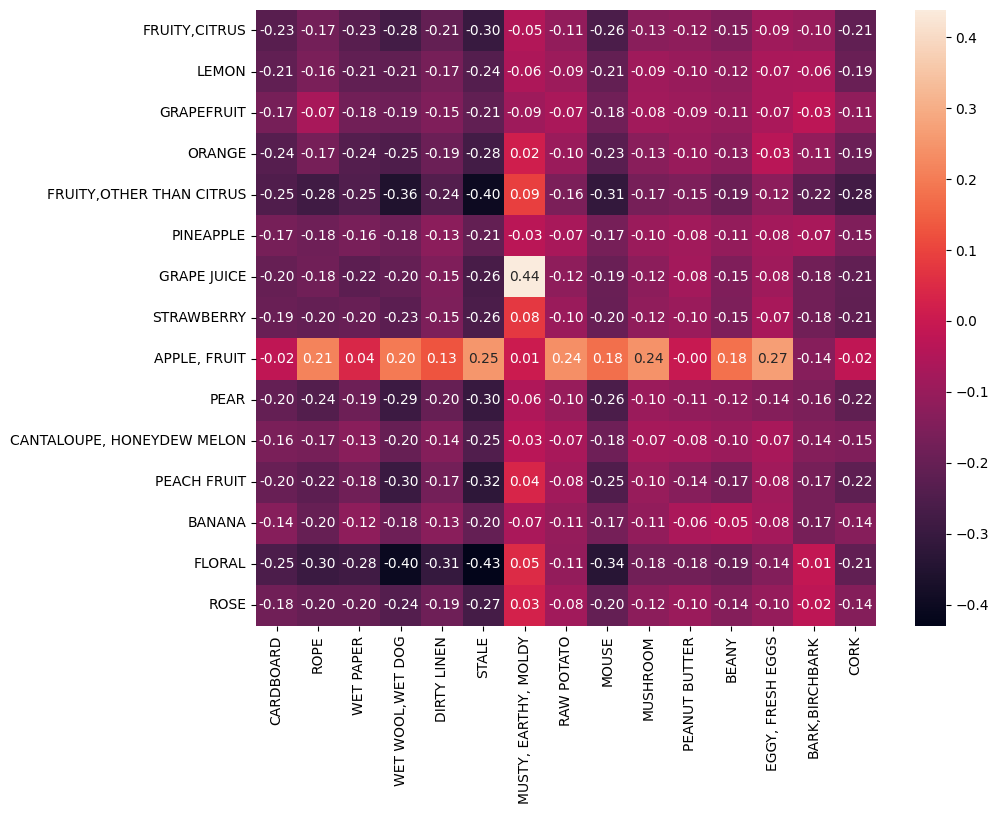

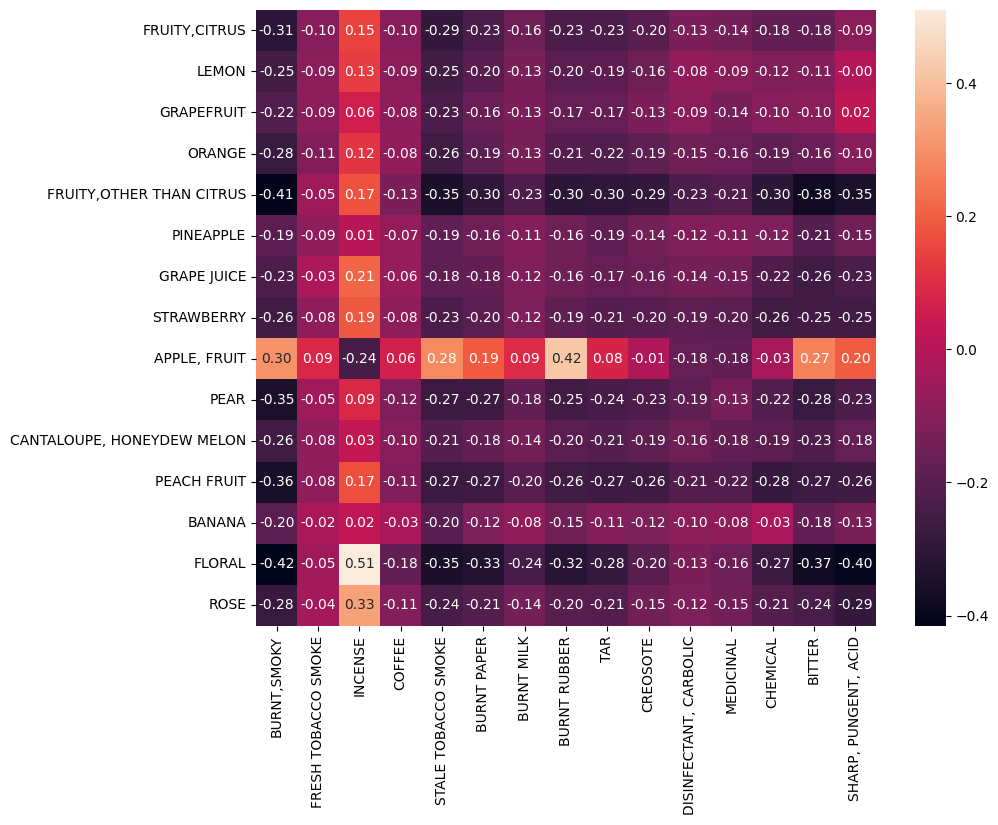

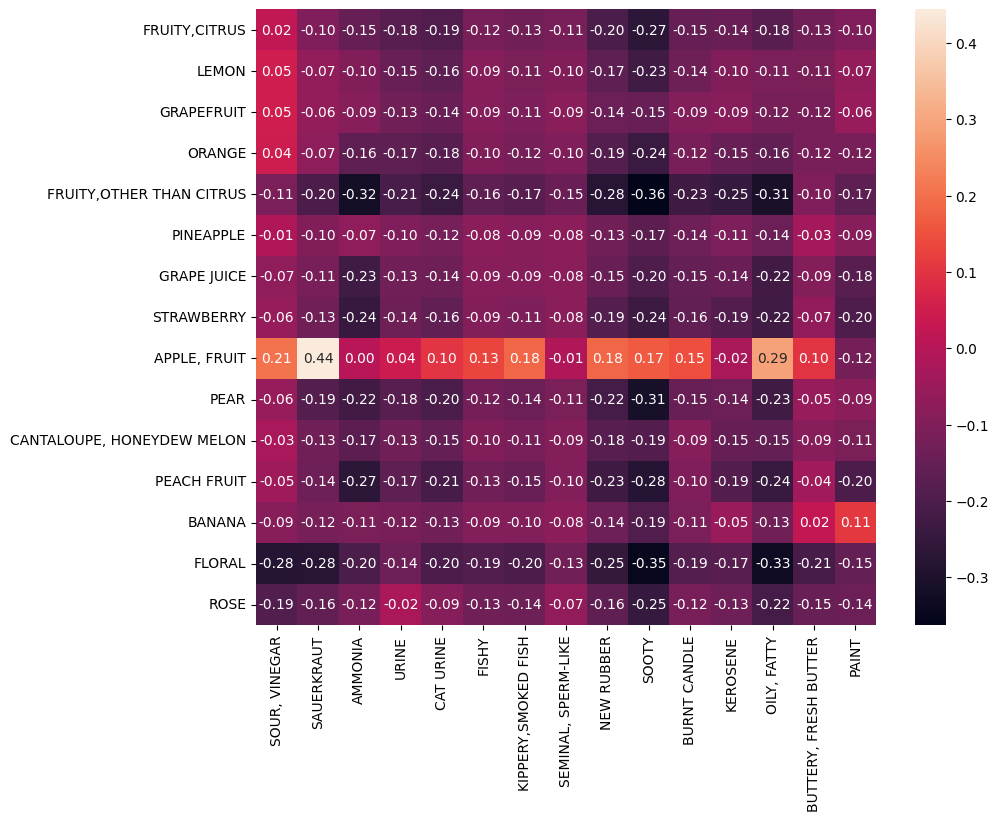

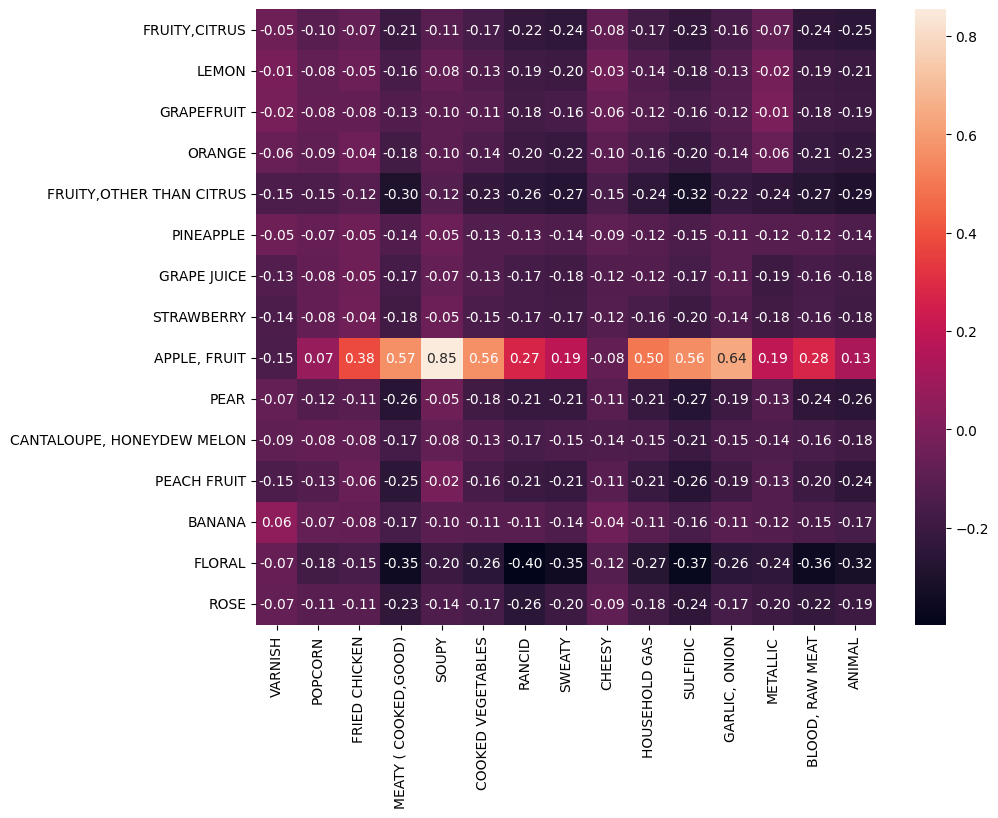

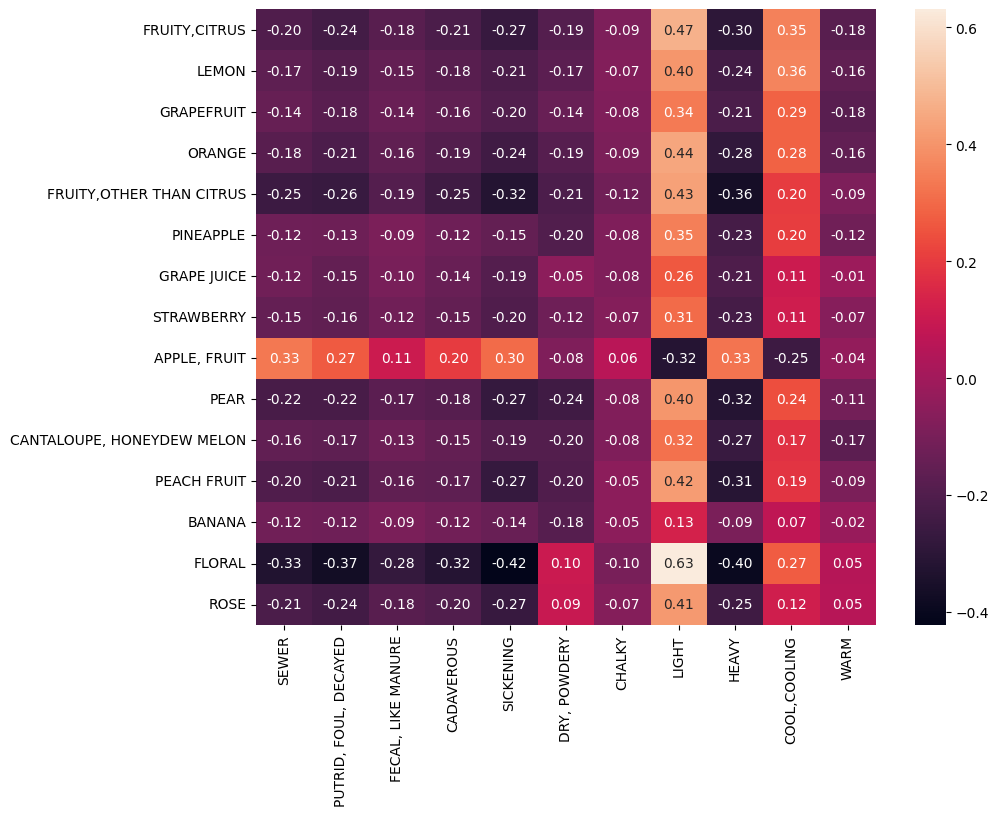

In [24]:
for i in range(0,146,15):
  plt.figure(figsize=(10,8))
  sns.heatmap(corr.iloc[0:15,i:i+15],annot=True,fmt=".2f")
  plt.show()

# Dimensionality Reduction

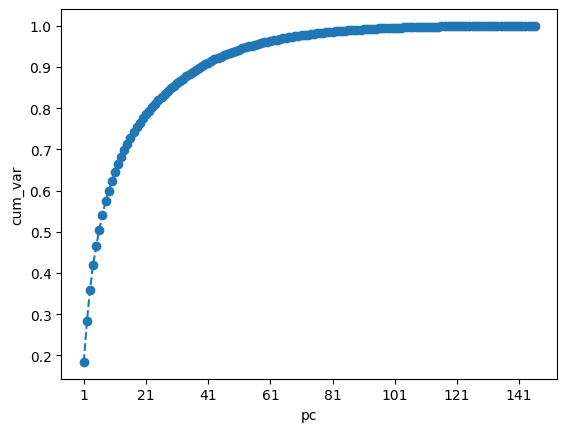

In [25]:
from sklearn.decomposition import PCA

# n = 146 columns
n = X_train_scaled.shape[1]
pca = PCA(n_components=n, random_state=1)

pca.fit_transform(X_train_scaled)

pca_var_explain = pd.DataFrame({'pc': [str(i) for i in range(1,n+1)], 'cum_var': pca.explained_variance_ratio_.cumsum()})

pca_var_explain.plot(kind = "line", x = "pc",
                     y = "cum_var",
                     legend = False,
                     ylabel="cum_var",
                     marker = 'o',
                     linestyle = '--')
plt.show()

In [26]:
retain_n_pcs = (pca_var_explain['cum_var'] < .80).sum() + 1

In [27]:
retain_n_pcs

23

In [28]:
pca = PCA(n_components=retain_n_pcs, random_state=1)

# Create Data with PCs
Note we are doing this to make the clustering more efficient.

In [29]:
X_train_pca = pd.DataFrame(pca.fit_transform(X_train_scaled),
                           index=X_train_scaled.index,
                           columns = ['pc'+str(i) for i in range(1,retain_n_pcs+1)])

X_train_pca

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,...,pc14,pc15,pc16,pc17,pc18,pc19,pc20,pc21,pc22,pc23
Stimulus,,,,,,,,,,,,,,,,,,,,,
Abhexone_high,0.932111,-1.606834,6.902369,-6.213805,3.689568,2.083625,0.465678,-0.752217,5.022086,-0.449819,...,-1.828921,-0.995349,-0.798166,0.070406,-2.931207,0.405881,-0.812695,-0.329232,-0.218739,-1.282785
Acetophenone_high,-3.022384,5.554685,-1.924736,-1.260756,-0.664008,-0.571789,5.307758,-0.654393,0.576037,1.681078,...,-1.514249,0.704900,0.199883,-1.873802,-0.137027,1.595827,1.004181,-0.402520,0.246895,-0.132261
AcetylPyridine_high,7.105302,-2.042633,9.483976,-1.031933,-2.390644,0.444594,-1.460236,0.071301,-4.759030,5.782120,...,-0.430008,-1.558262,1.717896,-0.774338,0.600172,0.522599,-2.187683,0.068492,-0.974740,0.592236
Adoxal_high,0.206758,-0.321193,1.002858,2.924334,1.384548,0.980613,0.533515,1.384347,0.344961,-0.532579,...,2.182813,0.081266,0.107972,-0.383026,-1.226962,0.591493,4.186333,1.197225,0.367096,-0.168516
AldehydeC-16highcon_high,-7.019010,-6.377694,-2.234181,-0.661698,-0.338774,4.855587,0.220773,-0.070584,-1.902097,-3.159139,...,-1.089620,-1.632873,-0.883029,0.359743,-0.229188,-0.025304,0.336538,-0.267276,-1.813996,0.643591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Phenoxaflor_high,-7.209345,-3.988738,-1.708102,1.462930,-0.283034,0.418886,1.991184,1.372560,0.277879,0.008672,...,1.865973,-1.617154,0.486616,1.879276,0.762365,-0.351937,-0.897553,0.595435,-0.993355,0.074623
Pyrrolinemixture_high,6.327870,-3.530384,-0.129207,-0.589756,-3.776838,-2.203189,-2.038271,-0.097106,0.497370,0.377526,...,0.857928,0.802395,1.875268,-1.148456,-3.817122,1.567810,1.483616,5.458300,-0.246077,2.801257
Rosemarel_high,-4.455349,3.634205,-2.548677,0.169222,-0.283654,-0.335515,-1.924763,0.014282,-0.001327,0.705675,...,-2.447111,-0.263181,1.291100,0.276836,0.636627,-0.469620,1.286925,-0.192198,-1.009688,-0.287296


# K-Means (using the newly created data with PCs)

### Evaluate K

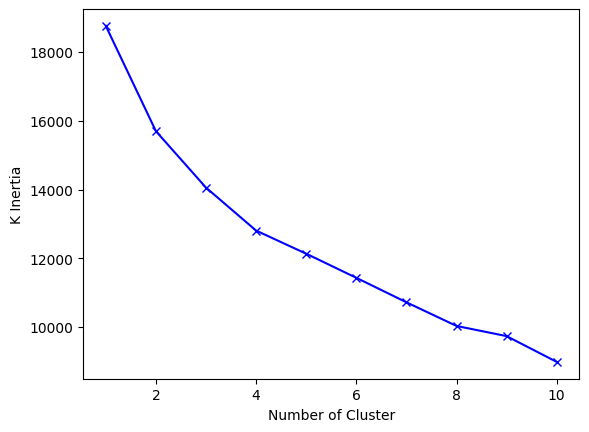

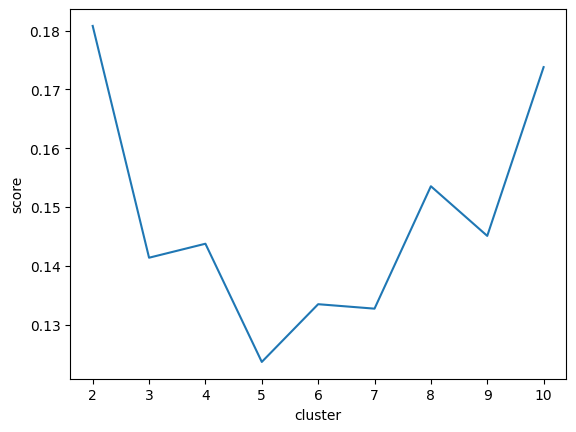

In [30]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")

k_inertia = {}

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X_train_pca)
    k_inertia[k] = kmeans.inertia_

plt.figure()
plt.plot(pd.DataFrame.from_dict(k_inertia, orient = "index"), 'bx-')
plt.xlabel("Number of Cluster")
plt.ylabel("K Inertia")
plt.show()

k_silhouette = {}

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X_train_pca)
    labels = kmeans.predict(X_train_pca)
    k_silhouette[k] = silhouette_score(X_train_pca, labels)

plt.figure()
plt.plot(pd.DataFrame.from_dict(k_silhouette, orient = "index"))
plt.xlabel("cluster")
plt.ylabel("score")
plt.show()

**A silhouette score close to 1 suggests that the data points are well-clustered and separated from other clusters. My most significant silhouette score, 0.18, is not close to 1 but is the most important.**

In [31]:
k_silhouette

{2: 0.1808095753304249,
 3: 0.1413895387838971,
 4: 0.14376781261537955,
 5: 0.12366730295744584,
 6: 0.13348405404889613,
 7: 0.13272641719365835,
 8: 0.1535454081587156,
 9: 0.14510029540336009,
 10: 0.17380410148259778}

### Fit a new KMeans model based on your diagnostic plots: how many clusters are there?
n_clusters should be consistent with the plots. Use a consensus approach, evaluating the two different plots and deciding on the best. If there's disagreement, it's best to be conservative, opting for the lower cluster number. Or, alternatively, create two clustering solutions and evaluate the results by examining the data in more detail. This is the goal of the next section. What are we even clustering? Is there some rule we can assign to determine membership in a cluster? What do the members have in common?

**The inerta graph (top graph above) doesn't have a clearly defined elbow. According to the textbook (page 270) the silhouette graph (bottom graph above) is more precise. Thus, we will have two clusters (k=2).**

In [32]:
kmeans = KMeans(n_clusters=2, random_state=1)
X_trained_processed_kmeans = X_train_scaled.copy()
kmeans.fit(X_trained_processed_kmeans)

KMeans(n_clusters=2, random_state=1)

### Go back to the scaled data and add the clusters as a new column (you may need to convert from NumPy array to Pandas)
Note: make sure that this dataframe contains the names as well. In Pandas: pd.DataFrame(data, index=fragrance_data.index, columns=fragrance_data.columns)

In [33]:
pred = kmeans.predict(X_train_scaled)

In [34]:
X_train_scaled["Cluster_No"] = pd.Series(pred, index=X_train_scaled.index)

In [35]:
X_train_scaled

,"FRUITY,CITRUS",LEMON,GRAPEFRUIT,ORANGE,"FRUITY,OTHER THAN CITRUS",PINEAPPLE,GRAPE JUICE,STRAWBERRY,"APPLE, FRUIT",PEAR,...,"FECAL, LIKE MANURE",CADAVEROUS,SICKENING,"DRY, POWDERY",CHALKY,LIGHT,HEAVY,"COOL,COOLING",WARM,Cluster_No
Stimulus,,,,,,,,,,,,,,,,,,,,,
Abhexone_high,-0.364116,-0.460510,-0.402583,-0.464531,-0.619490,-0.349481,-0.182734,-0.441156,0.508121,-0.655415,...,-0.347093,-0.368579,-0.303126,0.117010,-0.429862,-0.096697,0.437274,-0.865254,-0.048137,0
Acetophenone_high,-0.317498,-0.397858,-0.275180,-0.359065,0.106665,-0.220082,0.099100,0.069211,-0.512085,0.094110,...,-0.310436,-0.319606,-0.067509,-0.236179,-0.429862,-0.357102,2.060773,0.303485,2.582273,1
AcetylPyridine_high,-0.549596,-0.394118,-0.402583,-0.464531,-0.674146,-0.349481,-0.346952,-0.078304,-0.512085,-0.655415,...,-0.249812,-0.104879,0.052058,2.225979,0.746814,-1.256767,1.099283,-1.136372,1.358783,0
Adoxal_high,0.134795,0.022933,0.241924,0.484660,-0.357563,0.319509,-0.346952,-0.149518,0.673560,-0.014030,...,-0.451423,-0.507963,0.554355,-0.233638,0.423805,0.266786,-0.422287,-0.346832,0.156093,1
AldehydeC-16highcon_high,0.946146,0.059402,-0.402583,1.034025,3.613218,1.088135,2.646700,6.286867,0.577054,2.007077,...,-0.451423,-0.507963,-0.771429,-1.565084,-0.169477,0.745100,-1.302864,0.317224,-1.088199,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Phenoxaflor_high,1.000699,1.146914,1.062547,0.396509,1.715847,-0.046689,1.040025,1.546053,-0.512085,1.093477,...,-0.341453,-0.507963,-0.727471,0.218647,-0.429862,1.128474,-0.903557,0.438128,-0.959609,1
Pyrrolinemixture_high,-0.549596,-0.460510,-0.402583,-0.464531,-0.724544,-0.349481,-0.346952,-0.295337,-0.512085,-0.655415,...,0.364892,0.426287,1.220178,0.543885,-0.429862,-0.867063,0.639029,-1.060349,-0.101086,0
Rosemarel_high,1.103853,1.098289,0.410545,0.105298,0.047039,-0.161853,-0.025174,-0.195298,-0.512085,-0.114713,...,-0.349912,-0.507963,-0.740951,-1.214436,-0.192549,1.568812,-0.987622,1.584884,-0.507655,1


### What can we say about the data?
Draw conclusions from the two clusters using **averaged data** (in pandas refer to "groupby"). Let's say we have a new ingredient for personal care products (e.g., a fragrance that we might add to our soap products). If we predict its membership, then what can we say about it? Is it going to be pleasant or unpleasant to the consumer?

In [36]:
X_train_scaled.groupby("Cluster_No").mean()

,"FRUITY,CITRUS",LEMON,GRAPEFRUIT,ORANGE,"FRUITY,OTHER THAN CITRUS",PINEAPPLE,GRAPE JUICE,STRAWBERRY,"APPLE, FRUIT",PEAR,...,"PUTRID, FOUL, DECAYED","FECAL, LIKE MANURE",CADAVEROUS,SICKENING,"DRY, POWDERY",CHALKY,LIGHT,HEAVY,"COOL,COOLING",WARM
Cluster_No,,,,,,,,,,,,,,,,,,,,,
0,-0.449033,-0.370122,-0.324679,-0.395574,-0.546847,-0.270402,-0.309585,-0.352166,0.373146,-0.420669,...,0.777793,0.578510,0.691778,0.862291,-0.021143,0.199570,-0.857204,0.698298,-0.644320,-0.175327
1,0.284082,0.234159,0.205409,0.250261,0.345964,0.171070,0.195860,0.222799,-0.236072,0.266138,...,-0.492073,-0.365996,-0.437656,-0.545531,0.013376,-0.126259,0.542313,-0.441781,0.407631,0.110921


**As shown below, Stimuli with (average) higher fragrance characteristics typically associated with "bad" smells correspond with Cluster_No 0.**

In [37]:
X_train_scaled[["RANCID","SEWER","PUTRID, FOUL, DECAYED","FECAL, LIKE MANURE","CADAVEROUS","Cluster_No"]].groupby("Cluster_No").mean()

,RANCID,SEWER,"PUTRID, FOUL, DECAYED","FECAL, LIKE MANURE",CADAVEROUS
Cluster_No,,,,,
0,0.790201,0.680680,0.777793,0.578510,0.691778
1,-0.499923,-0.430634,-0.492073,-0.365996,-0.437656


**As shown below, Stimuli with (average) higher fragrance characteristics typically associated with "good" smells correspond with Cluster_No 1.**

In [38]:
X_train_scaled[["FRAGRANT","AROMATIC","COLOGNE","VANILLA","ROSE","Cluster_No"]].groupby("Cluster_No").mean()

,FRAGRANT,AROMATIC,COLOGNE,VANILLA,ROSE
Cluster_No,,,,,
0,-0.952292,-0.760788,-0.632857,-0.232809,-0.455937
1,0.602471,0.481315,0.400379,0.147287,0.288450


In [39]:
pd.set_option('display.max_columns', None)
X_train_scaled[X_train_scaled["Cluster_No"]==1]

,"FRUITY,CITRUS",LEMON,GRAPEFRUIT,ORANGE,"FRUITY,OTHER THAN CITRUS",PINEAPPLE,GRAPE JUICE,STRAWBERRY,"APPLE, FRUIT",PEAR,"CANTALOUPE, HONEYDEW MELON",PEACH FRUIT,BANANA,FLORAL,ROSE,VIOLETS,LAVENDER,COLOGNE,MUSK,PERFUMERY,FRAGRANT,AROMATIC,HONEY,"CHERRY, BERRY",ALMOND,NAIL POLISH REMOVER,"NUTTY, WALNUT ETC.",SPICY,CLOVE,CINNAMON,LAUREL LEAVES,TEA LEAVES,SEASONING FOR MEAT,BLACK PEPPER,GREEN PEPPER,DILL,CARAWAY,"OAK WOOD,COGNAC","WOODY, RESINOUS",CEDARWOOD,MOTHBALLS,"MINTY, PEPPERMINT",CAMPHOR,EUCALYPTUS,CHOCOLATE,VANILLA,SWEET,MAPLE SYRUP,CARAMEL,MALTY,RAISINS,MOLASSES,COCONUT,"ANISE, LICORICE",ALCOHOLIC,"ETHERISH, ANAESTHETIC",CLEANING FLUID,"GASOLINE, SOLVENT","TURPENTINE, PINE OIL",GERANIUM LEAVES,CELERY,FRESH GREEN VEGETABLES,CRUSHED WEEDS,CRUSHED GRASS,"HERBAL, GREEN,CUTGRASS",RAW CUCUMBER,HAY,GRAINY (AS GRAIN),YEASTY,BAKERY (FRESH BREAD),SOUR MILK,"FERMENTED, ROTTEN FRUIT",BEERY,SOAPY,LEATHER,CARDBOARD,ROPE,WET PAPER,"WET WOOL,WET DOG",DIRTY LINEN,STALE,"MUSTY, EARTHY, MOLDY",RAW POTATO,MOUSE,MUSHROOM,PEANUT BUTTER,BEANY,"EGGY, FRESH EGGS","BARK,BIRCHBARK",CORK,"BURNT,SMOKY",FRESH TOBACCO SMOKE,INCENSE,COFFEE,STALE TOBACCO SMOKE,BURNT PAPER,BURNT MILK,BURNT RUBBER,TAR,CREOSOTE,"DISINFECTANT, CARBOLIC",MEDICINAL,CHEMICAL,BITTER,"SHARP, PUNGENT, ACID","SOUR, VINEGAR",SAUERKRAUT,AMMONIA,URINE,CAT URINE,FISHY,"KIPPERY,SMOKED FISH","SEMINAL, SPERM-LIKE",NEW RUBBER,SOOTY,BURNT CANDLE,KEROSENE,"OILY, FATTY","BUTTERY, FRESH BUTTER",PAINT,VARNISH,POPCORN,FRIED CHICKEN,"MEATY ( COOKED,GOOD)",SOUPY,COOKED VEGETABLES,RANCID,SWEATY,CHEESY,HOUSEHOLD GAS,SULFIDIC,"GARLIC, ONION",METALLIC,"BLOOD, RAW MEAT",ANIMAL,SEWER,"PUTRID, FOUL, DECAYED","FECAL, LIKE MANURE",CADAVEROUS,SICKENING,"DRY, POWDERY",CHALKY,LIGHT,HEAVY,"COOL,COOLING",WARM,Cluster_No
Stimulus,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Acetophenone_high,-0.317498,-0.397858,-0.275180,-0.359065,0.106665,-0.220082,0.099100,0.069211,-0.512085,0.094110,-0.251298,-0.144143,0.314182,0.906457,0.789232,1.789226,1.954963,0.857996,1.516890,1.039747,1.033771,2.065418,0.944398,1.631849,3.837661,1.950672,0.102212,0.923037,0.420353,0.509865,-0.194606,-0.637819,-0.500780,-0.451588,-0.232548,0.150856,-0.519774,0.695075,0.604074,0.961812,2.898225,0.181148,1.474180,1.120735,-0.155937,0.582445,0.840566,-0.028025,0.174973,-0.227347,0.147547,0.032748,-0.003562,0.250308,0.618602,1.402030,1.719838,1.214202,1.331512,0.417022,-0.219029,-0.177396,-0.124687,-0.097406,0.814988,-0.346381,0.842807,-0.689558,-0.319899,-0.374783,-0.304374,-0.448003,0.002580,0.641700,0.456835,-0.039551,-0.446405,-0.832762,-0.054048,-0.375008,-0.208091,-0.102534,-0.501031,-0.453838,-0.384608,-0.267718,-0.583218,-0.592317,0.752903,-0.790000,0.057765,-0.195990,2.297755,-0.304790,-0.553575,-0.354433,-0.422837,0.296948,1.440604,2.465681,1.301117,1.156289,1.664860,0.572751,0.278835,-0.597855,-0.478560,0.123680,-0.102964,0.204562,-0.226435,-0.311996,-0.158689,0.777865,-0.863240,0.685921,0.348559,0.397611,-0.150212,1.219714,2.426967,-0.223321,-0.264549,-0.287593,-0.486887,-0.476035,-0.483990,-0.033068,-0.521628,-0.297189,-0.318490,-0.279313,0.996945,-0.570408,-0.240176,-0.368821,-0.436294,-0.310436,-0.319606,-0.067509,-0.236179,-0.429862,-0.357102,2.060773,0.303485,2.582273,1
Adoxal_high,0.134795,0.022933,0.241924,0.484660,-0.357563,0.319509,-0.346952,-0.149518,0.673560,-0.014030,0.924203,-0.000872,-0.158072,0.280168,-0.042576,0.000645,-0.160388,0.580888,-0.918155,-0.023435,-0.437036,-0.544963,-0.557002,-0.047986,-0.613481,-0.600437,-0.642308,-0.195988,-0.379709,-0.333953,0.875567,1.291523,-0.500780,-0.192327,-0.364377,0.178676,-0.519774,0.298189,-0.184913,-0.318670,-0.324576,-0.413458,-0.574650,-0.504664,-0.243364,-0.455897,-0.361621,-0.319708,-0.415335,-0.634184,-0.631810,-0.393240,-0.272418,-0.342971,-0.417176,0.002449,-0.356374,-0.273120,-0.225518,1.642275,1.151579,1.787678,1.386968,1.393950,0.599830,0.921345,-0.923960,-0.6895

In [40]:
X_train_scaled[X_train_scaled["Cluster_No"]==0]

,"FRUITY,CITRUS",LEMON,GRAPEFRUIT,ORANGE,"FRUITY,OTHER THAN CITRUS",PINEAPPLE,GRAPE JUICE,STRAWBERRY,"APPLE, FRUIT",PEAR,"CANTALOUPE, HONEYDEW MELON",PEACH FRUIT,BANANA,FLORAL,ROSE,VIOLETS,LAVENDER,COLOGNE,MUSK,PERFUMERY,FRAGRANT,AROMATIC,HONEY,"CHERRY, BERRY",ALMOND,NAIL POLISH REMOVER,"NUTTY, WALNUT ETC.",SPICY,CLOVE,CINNAMON,LAUREL LEAVES,TEA LEAVES,SEASONING FOR MEAT,BLACK PEPPER,GREEN PEPPER,DILL,CARAWAY,"OAK WOOD,COGNAC","WOODY, RESINOUS",CEDARWOOD,MOTHBALLS,"MINTY, PEPPERMINT",CAMPHOR,EUCALYPTUS,CHOCOLATE,VANILLA,SWEET,MAPLE SYRUP,CARAMEL,MALTY,RAISINS,MOLASSES,COCONUT,"ANISE, LICORICE",ALCOHOLIC,"ETHERISH, ANAESTHETIC",CLEANING FLUID,"GASOLINE, SOLVENT","TURPENTINE, PINE OIL",GERANIUM LEAVES,CELERY,FRESH GREEN VEGETABLES,CRUSHED WEEDS,CRUSHED GRASS,"HERBAL, GREEN,CUTGRASS",RAW CUCUMBER,HAY,GRAINY (AS GRAIN),YEASTY,BAKERY (FRESH BREAD),SOUR MILK,"FERMENTED, ROTTEN FRUIT",BEERY,SOAPY,LEATHER,CARDBOARD,ROPE,WET PAPER,"WET WOOL,WET DOG",DIRTY LINEN,STALE,"MUSTY, EARTHY, MOLDY",RAW POTATO,MOUSE,MUSHROOM,PEANUT BUTTER,BEANY,"EGGY, FRESH EGGS","BARK,BIRCHBARK",CORK,"BURNT,SMOKY",FRESH TOBACCO SMOKE,INCENSE,COFFEE,STALE TOBACCO SMOKE,BURNT PAPER,BURNT MILK,BURNT RUBBER,TAR,CREOSOTE,"DISINFECTANT, CARBOLIC",MEDICINAL,CHEMICAL,BITTER,"SHARP, PUNGENT, ACID","SOUR, VINEGAR",SAUERKRAUT,AMMONIA,URINE,CAT URINE,FISHY,"KIPPERY,SMOKED FISH","SEMINAL, SPERM-LIKE",NEW RUBBER,SOOTY,BURNT CANDLE,KEROSENE,"OILY, FATTY","BUTTERY, FRESH BUTTER",PAINT,VARNISH,POPCORN,FRIED CHICKEN,"MEATY ( COOKED,GOOD)",SOUPY,COOKED VEGETABLES,RANCID,SWEATY,CHEESY,HOUSEHOLD GAS,SULFIDIC,"GARLIC, ONION",METALLIC,"BLOOD, RAW MEAT",ANIMAL,SEWER,"PUTRID, FOUL, DECAYED","FECAL, LIKE MANURE",CADAVEROUS,SICKENING,"DRY, POWDERY",CHALKY,LIGHT,HEAVY,"COOL,COOLING",WARM,Cluster_No
Stimulus,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Abhexone_high,-0.364116,-0.460510,-0.402583,-0.464531,-0.619490,-0.349481,-0.182734,-0.441156,0.508121,-0.655415,-0.484997,-0.649360,-0.381225,-0.902314,-0.549661,-0.650892,-0.808762,-0.763087,-0.238162,-0.930267,-0.489760,-0.482129,0.983116,-0.451921,1.174671,-0.600437,1.360578,0.475952,-0.211035,-0.134030,-0.877478,-0.384284,2.760013,1.592585,-0.364377,0.456879,0.987482,0.408435,-0.319344,-0.595717,-0.465763,-0.486480,-0.518854,-0.641977,0.708042,1.237124,0.141465,5.968877,5.166209,2.289579,0.228973,4.654713,0.323252,-0.051259,-0.319645,-0.783395,-0.569960,-0.665970,-0.695301,-0.804174,3.433414,0.318464,-0.570932,-0.537659,-0.810169,-0.116395,-0.533689,-0.374575,-0.821811,-0.374783,-0.304374,-0.229756,-0.787762,-0.679141,-0.551765,-0.496219,-0.392909,-0.196089,-0.367187,-0.678689,-0.282731,-0.279389,-0.188233,-0.704893,-0.246236,-0.044933,0.120399,0.500737,-0.401799,0.002364,1.353941,-0.529694,-1.138418,4.493129,0.978060,1.805203,-0.422837,-0.320293,0.391663,-0.428295,-0.775846,-0.634552,-0.593821,0.172504,-0.457532,-0.408205,-0.041963,-0.410209,-0.576658,-0.538034,0.000485,1.040798,-0.301495,-0.655871,0.015361,0.660721,-0.491411,-0.860410,1.389089,-0.837453,-0.707110,0.077156,-0.264549,0.798079,0.374680,0.293767,-0.593838,-0.649677,0.961579,-0.437049,-0.282755,-0.103060,-1.033458,-0.440498,-0.720079,-0.277183,-0.411042,-0.347093,-0.368579,-0.303126,0.117010,-0.429862,-0.096697,0.437274,-0.865254,-0.048137,0
AcetylPyridine_high,-0.549596,-0.394118,-0.402583,-0.464531,-0.674146,-0.349481,-0.346952,-0.078304,-0.512085,-0.655415,-0.484997,-0.649360,-0.381225,-0.848219,-0.466127,-0.650892,-0.808762,-0.763087,-0.096896,-0.932352,-0.955325,-1.224998,-0.926975,-0.562221,1.614115,-0.450122,3.221879,0.300093,-0.379709,-0.333953,-0.877478,-0.841885,1.676468,1.871790,0.778139,0.017318,-0.037724,-0.910111,-0.135301,-0.531105,-0.470085,-0.541619,-0.766589,-0.528614,0.306909,-0.101620,-1.026294,-0.165160,-0.415335,0.883865,-0.631810,-0.090789,-0.272418,-0.342971,-0.614188,-0.946841,-0.579581,-0.773242,-0.883723,-0.516118,-0.471311,0.067473,-0.180468,-0.

**In conclusion, if we introduce a new fragrance and predict its membership, we can determine whether it belongs to Cluster_No 0 or Cluster_No 1. It is more likely to be pleasant to the consumer if it belongs to Cluster_No 1. On the other hand, it is more likely to be unpleasant to the consumer if it belongs to Cluster_No 0.**